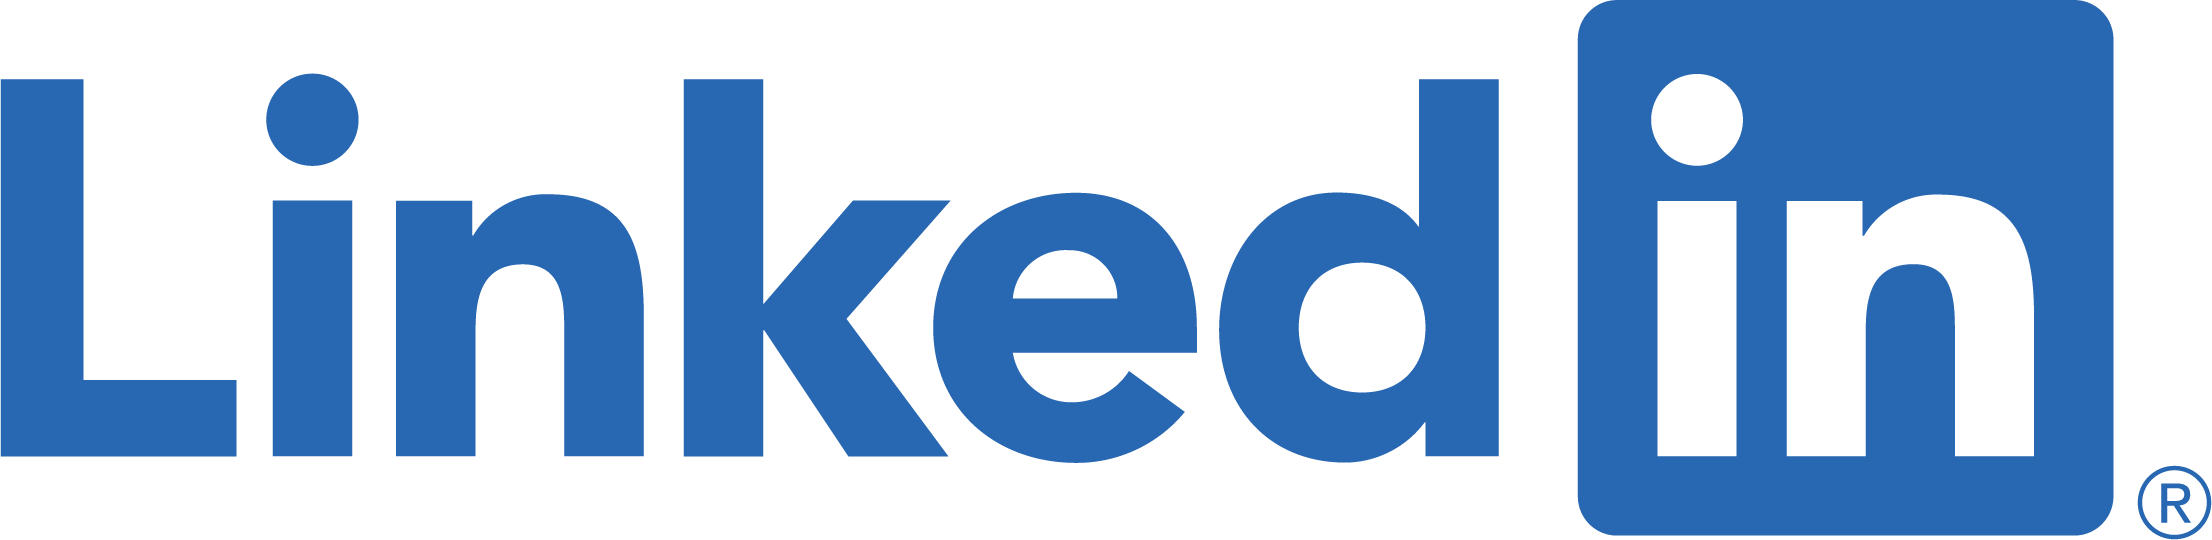

# **LinkedIn - Accept all invitations and send first message**

**Author:** [Kanika Varandani](https://www.linkedin.com/in/ka-nick-ka/)

**Last update:** 2024-03-28 (Created: 2023-12-18)


**Description:** This notebook helps you quickly and easily accept all LinkedIn invitations and send a personalized introductory message to each new connection.

## **Input**

### **Import libraries**

In [ ]:
import naas
from naas_drivers import linkedin
import pandas as pd

### **Setup variables**

#### **Pre-requisite**



##### **Mandatory**

*   **li_at:** Cookie used to authenticate Members and API clients
*   **JSESSIONID:** Cookie used for Cross Site Request Forgery (CSRF) protection and URL signature **validation**

##### **Optional**



*   **limit:** Number of invitations to be accepted. If limit = -1, all invitations are accepted.
*   **first_message:** First message to be send
*   **cron:** Cron params for naas scheduler. More information: https://crontab.guru/



In [ ]:
# Mandatory
li_at = naas.secret.get("LINKEDIN_LI_AT") or "YOUR_COOKIE_LI_AT"
JSESSIONID = naas.secret.get("LINKEDIN_JSESSIONID") or "YOUR_COOKIE_JSESSIONID"

# Optional
limit = -1
first_message = "Hello, Nice to connect!"
cron = "0 18 * * *"

## **Model**

#### **Get invitations received**

In [ ]:
df_invitation = linkedin.connect(li_at, JSESSIONID).invitation.get_received()
print('Invitations received:', len(df_invitation))
df_invitation

#### **Accept pending invitations received from "Profile"**

In [ ]:
def accept_new_contact(df, limit):
    # Init
    df_accept = pd.DataFrame()
    if len(df) == 0:
        return df_accept

    # Loop
    for index, row in df.iterrows():
        fullname = row.FULLNAME
        status = row.INVITATION_STATUS
        invitation_id = row.INVITATION_ID
        shared_secret = row.SHARED_SECRET
        if status == "PENDING":
            print(fullname)
            tmp_df = linkedin.connect(li_at, JSESSIONID).invitation.accept(
                invitation_id, shared_secret
            )
            df_accept = pd.concat([df_accept, tmp_df])
        if index != -1 and index + 1 >= limit:
            break
    return df_accept

df_accept = accept_new_contact(df_invitation, limit)
print('Invitations accepted:', len(df_accept))
df_accept


#### **Send first message to contact**

In [ ]:
def send_first_message(df):
    if len(df) > 0:
        # Loop
        for index, row in df.iterrows():
            fullname = row.FULLNAME
            profile_id = row.PROFILE_ID
            print("Message sent to:", fullname)
            linkedin.connect(li_at, JSESSIONID).message.send(FIRST_MESSAGE, profile_id)

send_first_message(df_accept)

## **Output**

### **Display result**

In [ ]:
df_accept


### **Add scheduler**

In [ ]:
# Schedule your notebook every hour
naas.scheduler.add(cron=cron)

# -> Uncomment the line below to remove your scheduler
# naas.scheduler.delete()